Searching, Sorting, and Timing
==============================



## Agenda



1.  Timing
2.  Building a timing utility
3.  The `timeit` module
4.  Drawing plots with `matplotlib`
5.  Timing plots
6.  Timing examples
    *  List indexing
    *  Linear search
    *  Binary search
    *  Insertion sort
    *  Bubble sort
7. Takeaways


## 1.  Timing

The **time module** contains functions for obtaining and interpreting the current system time.

In [1]:
import time
time.time()

1613525890.88373

In [2]:
time.localtime(time.time())

time.struct_time(tm_year=2021, tm_mon=2, tm_mday=16, tm_hour=19, tm_min=38, tm_sec=12, tm_wday=1, tm_yday=47, tm_isdst=0)

By taking start and stop "timestamps", we can measure the runtime of code.

In [3]:
t1 = time.time()
time.sleep(1) # waits for 1 sec
t2 = time.time()
t2 - t1

1.005091905593872

## 2. Building a timing utility

In [4]:
def timeit(fn):
    start = time.time()
    fn() # times how long this function takes to run
    end = time.time()
    return end - start

In [5]:
sum(range(10_000))

49995000

In [6]:
timeit(lambda: sum(range(10_000)))

0.0004363059997558594

To make timings more stable, we can run the passed-in function multiple times:

In [7]:
def timeit(fn, number=1):
    total = 0
    for i in range(number):
        start = time.time()
        fn()
        end = time.time()
        total += end - start
    return total

In [74]:
timeit(lambda: sum(range(10_000)), number=1000)

0.1797327995300293

Python has a built in library for doing what we just did...

## 3. The `timeit` module

The `timeit` module is a built-in library for measuring the execution of code passed in as a string.
- Also supports passing into "setup" code that is not timed

In [9]:
import timeit
timeit.timeit("sum(r)", 
              setup = "r = range(10_000)", 
              number=1000)
# measures amount of time to run the sum function

0.18249291699999048

We can easily use this to gather timings for multiple input values:

In [9]:
[timeit.timeit("sum(r)", 
               setup = "r = range({})".format(n), # creates range dependant on the value of n
               number=1000)
  for n in range(1000, 10_000, 1000)] # this is a list comprehension so it returns a list

[0.03386866700000013,
 0.04177779100000123,
 0.043891666999996914,
 0.055258541000000605,
 0.0692932500000012,
 0.08356575000000177,
 0.09877258399999889,
 0.1145081250000004,
 0.13016275000000022]

Sometimes we might want to make use of functions defined in our notebook in the timed/setup code passed to `timeit`. We need to use the `globals` argument for this:

In [77]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [106]:
[fib(n) for n in range(12)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [108]:
[timeit.timeit('fib({})'.format(n),
               number=100,
               globals=globals()) # recall: "globals()" returns a dictionary of everything
                                  # defined in this module; timeit needs it to access `fib`
                                  # not defined in the timeit module
 for n in range(1, 12)]

[3.254100010963157e-05,
 8.262500068667578e-05,
 0.0001327499994658865,
 0.00029958400045870803,
 0.0003945420003219624,
 0.0006609170004594489,
 0.0016709159999663825,
 0.0026752080002552248,
 0.004419332999532344,
 0.005617333000373037,
 0.006460040999627381]

## 4. Drawing plots with `matplotlib`

The [matplotlib library](https://matplotlib.org/) supports the creation of all sorts of visualizations. We will use it for drawing simple 2-dimensional plots.

The primary plotting function we will use is matplotlib.pyplot.plot [(full documentation here)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot), which, when passed two "array-like" objects of equal length, will interpret and plot their contents as x and y axis coordinates. We will generally use tuples, lists, and ranges as array-like objects. Note that generators are not considered array-like by matplotlib.

Some examples (note that we use a semicolon after the call to plot to hide its return value):

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

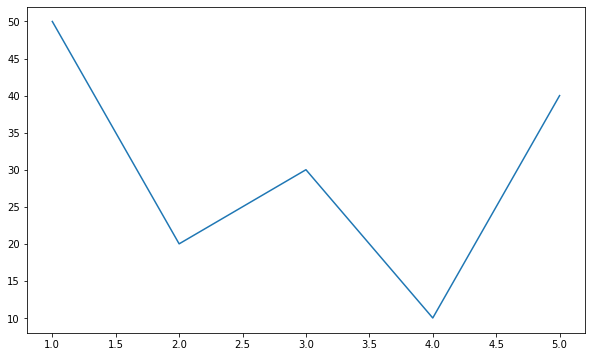

In [4]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40]);

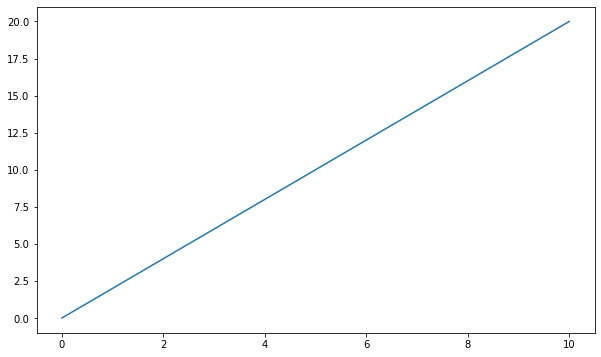

In [8]:
xs = range(11)
ys = [x*2 for x in xs] # all evens from 0-10 inclusive
plt.plot(xs, ys);

We can also provide an optional format string to plot, which controls marker, line-style, and color for the plot.

Here's a shortened list of options copied from the [full documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) of plot:

**Markers**
* `.` : point marker
* `o` : circle marker
* `s` : square marker
* `d` : diamond marker

**Line-styles**
* `-` : solid line style
* `--` : dashed line style
* `:` : dotted line style

**Colors**
* `k` : black
* `r` : red
* `b` : blue
* `g` : green
* `y` : yellow
* `c` : cyan

Here are the above plots with some color and styling (if we omit a line style no connecting line is drawn between data points):

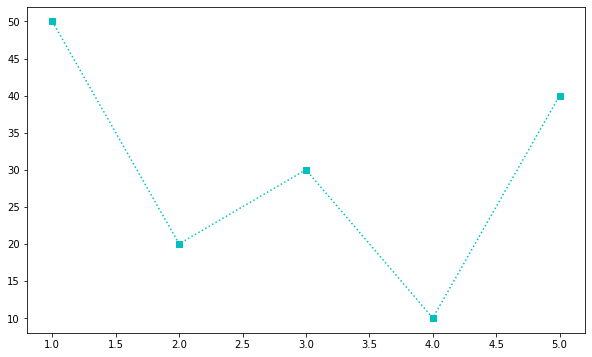

In [14]:
plt.plot([1, 2, 3, 4, 5], [50, 20, 30, 10, 40], 's:c');

In [ ]:
xs = range(11)
ys = [x*2 for x in xs]
plt.plot(xs, ys, 'dg');

Instead of regular `range` objects, which only allow for integral start/stop/step values, we typically prefer to use the [numpy library](https://numpy.org/)'s `arange` and `linspace` functions with matplotlib. `arange` is like range, except we can use floating point values for start/stop/step. `linspace` lets us specify start and stop values (both inclusive), and the number of values to return in that interval.

Examples of `arange` and `linspace` calls (note that both functions return numpy arrays, which are iterable and can be passed to `plot`):

In [15]:
np.arange(0.5, 2.5, 0.1) # allows for floating point values

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

In [20]:
np.linspace(10, 20, 41) # specifies (beginning, end, and the number of values wanted between them)

array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
       12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
       14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
       16.75, 17.  , 17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75,
       19.  , 19.25, 19.5 , 19.75, 20.  ])

In [24]:
np.linspace(1, 100_000, 100, dtype=int)
# we can specify the data type to coerce values into integers
# forces each value to be that type

array([     1,   1011,   2021,   3031,   4041,   5051,   6061,   7071,
         8081,   9091,  10101,  11112,  12122,  13132,  14142,  15152,
        16162,  17172,  18182,  19192,  20202,  21212,  22223,  23233,
        24243,  25253,  26263,  27273,  28283,  29293,  30303,  31313,
        32323,  33334,  34344,  35354,  36364,  37374,  38384,  39394,
        40404,  41414,  42424,  43434,  44445,  45455,  46465,  47475,
        48485,  49495,  50505,  51515,  52525,  53535,  54545,  55556,
        56566,  57576,  58586,  59596,  60606,  61616,  62626,  63636,
        64646,  65656,  66667,  67677,  68687,  69697,  70707,  71717,
        72727,  73737,  74747,  75757,  76767,  77778,  78788,  79798,
        80808,  81818,  82828,  83838,  84848,  85858,  86868,  87878,
        88889,  89899,  90909,  91919,  92929,  93939,  94949,  95959,
        96969,  97979,  98989, 100000])

`plot` can be called multiple times in the same cell to draw multiple lines in the same chart. Below we use this facility together with `linspace` and a handful of list comprehensions to plot some common runtime complexity bounding functions (more on that soon) over a small interval:

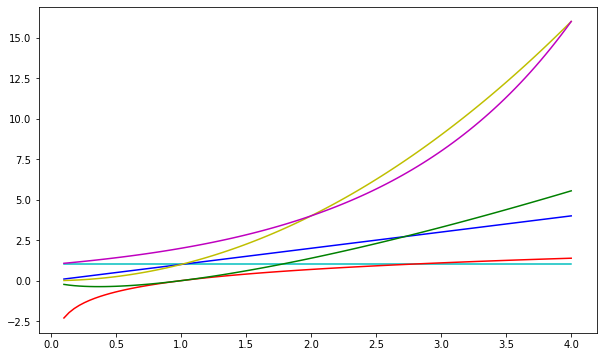

In [26]:
count = 100
xs = np.linspace(0.1, 4, count) # generate a range of x value from 1-4
ys_const        = [1] * count # creates a giant list of the value 1
ys_log          = [math.log(x) for x in xs]
ys_linear       = [x for x in xs]
ys_linearithmic = [x * math.log(x) for x in xs]
ys_quadratic    = [x**2 for x in xs]
ys_exponential  = [2**x for x in xs]

plt.plot(xs, ys_const, 'c')
plt.plot(xs, ys_log, 'r')
plt.plot(xs, ys_linear, 'b')
plt.plot(xs, ys_linearithmic, 'g')
plt.plot(xs, ys_quadratic, 'y');
plt.plot(xs, ys_exponential, 'm');

## 5. Plotting Timing

Plotting timing data collected from functions may help give us a sense of how their runtimes scale with increasing input sizes.

In [33]:
np.linspace(10, 10_000, 50, dtype=int)

array([   10,   213,   417,   621,   825,  1029,  1233,  1437,  1641,
        1844,  2048,  2252,  2456,  2660,  2864,  3068,  3272,  3475,
        3679,  3883,  4087,  4291,  4495,  4699,  4903,  5106,  5310,
        5514,  5718,  5922,  6126,  6330,  6534,  6737,  6941,  7145,
        7349,  7553,  7757,  7961,  8165,  8368,  8572,  8776,  8980,
        9184,  9388,  9592,  9796, 10000])

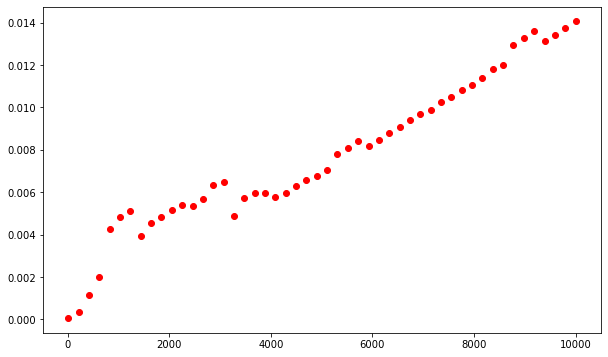

In [32]:
# runtimes for sum for increasing sizes of input

ns = np.linspace(10, 10_000, 50, dtype=int)
ts = [timeit.timeit('sum(range({}))'.format(n), number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

Clearly, the runtime of `sum` is directly proportional to the number of values it operates on.

If we assume a linear relationship, we can compute the average slope between adjacent data points to come up with an line of approximate fit that may help us predict the runtime of `sum`.

In [36]:
# find sum of slopes, then divide to find avergae slope
total = 0
for i in range(len(ns)-1):
    x0, x1 = ns[i:i+2]
    y0, y1 = ts[i:i+2]
    slope = (y1-y0) / (x1-x0)
    total += slope # recall: slope is (rise/run)
avg_slope = total / (len(ns)-1)

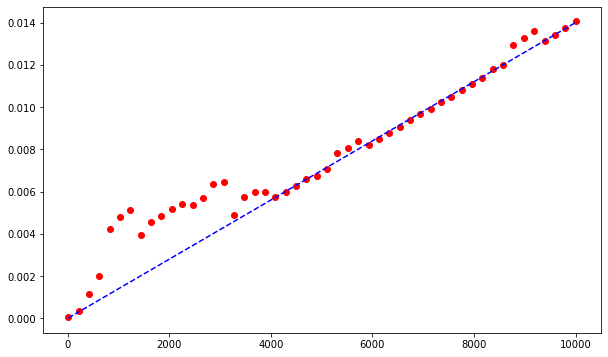

In [38]:
plt.plot(ns, ts, 'or')
plt.plot(ns, [avg_slope*n for n in ns], '--b');

In [39]:
# use line to make prediction
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print('Runtime of sum(range({:>11,})) ~ {:>5.2f} s'.format(n, avg_slope*n/100))

Runtime of sum(range(          1)) ~  0.00 s
Runtime of sum(range( 10,000,000)) ~  0.14 s
Runtime of sum(range( 20,000,000)) ~  0.28 s
Runtime of sum(range( 30,000,000)) ~  0.42 s
Runtime of sum(range( 40,000,000)) ~  0.56 s
Runtime of sum(range( 50,000,000)) ~  0.70 s
Runtime of sum(range( 60,000,000)) ~  0.84 s
Runtime of sum(range( 70,000,000)) ~  0.98 s
Runtime of sum(range( 80,000,000)) ~  1.12 s
Runtime of sum(range( 90,000,000)) ~  1.26 s
Runtime of sum(range(100,000,000)) ~  1.40 s


We can also use `polyfit` to compute a best-fitting polynomial function of arbitrary degree for our data:

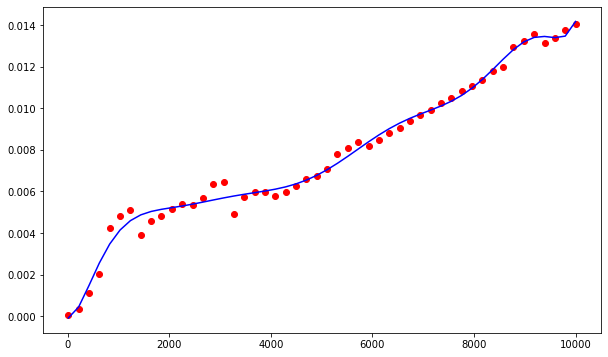

In [41]:
degree = 10 # biggest polynomial power
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, ts, 'or')
plt.plot(ns, [p(n) for n in ns], '-b');

Is there a downside to this approach?
* Yes! It's a horrible estimate.
* Not accurate representation of the growth of the function

In [42]:
# i.e., for input of size N, runtime is estimated at:
for n in np.linspace(1, 100_000_000, 11, dtype=int):
    print('Runtime of sum(range({:>11,})) ~ {:>5.2f} s'.format(n, p(n)/100))

Runtime of sum(range(          1)) ~ -0.00 s
Runtime of sum(range( 10,000,000)) ~ 1224671532716550455407971139584.00 s
Runtime of sum(range( 20,000,000)) ~ 1257178504510908787840996209590272.00 s
Runtime of sum(range( 30,000,000)) ~ 72555204714623838994422971911634944.00 s
Runtime of sum(range( 40,000,000)) ~ 1288948123722046086001900914837815296.00 s
Runtime of sum(range( 50,000,000)) ~ 12007242006062595681514708615993229312.00 s
Runtime of sum(range( 60,000,000)) ~ 74357968996887124948706147310562705408.00 s
Runtime of sum(range( 70,000,000)) ~ 347413504460930571120595600768195624960.00 s
Runtime of sum(range( 80,000,000)) ~ 1320701362440466443536574612554689544192.00 s
Runtime of sum(range( 90,000,000)) ~ 4289036709219121544476469169122883665920.00 s
Runtime of sum(range(100,000,000)) ~ 12301514959603223611936854996743752777728.00 s


Choosing an ill-fitting function will likely result in inaccurate runtime predictions. Worse, inaccuracies are compounded as input sizes grow large!

How do we know what class of function to use (e.g., linear, nth-degree polynomial, exponential) for modeling the runtime behavior of algorithms?

Can we reliably determine this through empirical observation?

!! It's important to think about algorithms in the long-run to understand their behavior !!

## 6. Timing Examples

### Built-in list indexing
What is the runtime behavior of list-indexing?

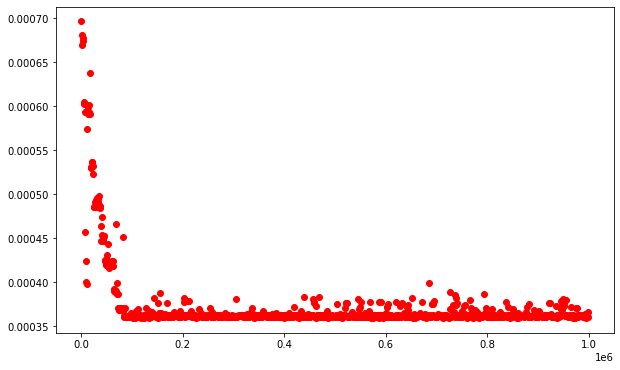

In [12]:
lst = list(range(1_000_000)) # creates list with a million elements
ns = np.linspace(0, len(lst), 1000, endpoint=False, dtype=int) # creates indices with elements to look up
ts = [timeit.timeit('_ = lst[{}]'.format(n),
                    globals=globals(), 
                    number=10000) 
      for n in ns]

plt.plot(ns, ts, 'or');

Observation: accessing an element in a list by index -- regardless of where in the list the element is located --  takes a constant
amount of time.

How? **A Python list uses an array as its underlying data storage
mechanism.** To access an element in an array, the interpreter:

1.  Computes an *offset* into the array by multiplying the element's
    index by the size of each array entry (which are uniformly sized,
    since they are merely *references* to the actual elements)
2.  Adds the offset to the *base address* of the array
3.  Accesses the reference and uses it to load the associated element

Each of the steps above can be performed in constant time.



### Linear Search



What is the runtime behavior of searching for an element in an unsorted list?

Has a runtime of O(n)


In [13]:
def contains(lst, x):
    for i in range(len(lst)):
        if x == lst[i]:
            return True
    return False

In [14]:
contains(lst, 99)

True

In [15]:
contains(lst, -3)

False

In [82]:
import random
lst = list(range(100))
random.shuffle(lst)
print(lst)
contains(lst, 10)

[86, 13, 69, 40, 38, 62, 7, 3, 72, 90, 60, 76, 4, 56, 23, 2, 21, 87, 99, 22, 26, 14, 54, 44, 1, 82, 96, 30, 81, 15, 53, 94, 71, 17, 55, 36, 85, 18, 9, 70, 84, 89, 25, 41, 10, 11, 59, 68, 63, 73, 0, 51, 80, 95, 45, 57, 75, 58, 47, 77, 46, 49, 27, 66, 8, 12, 52, 37, 88, 79, 35, 29, 34, 48, 28, 93, 92, 67, 83, 65, 20, 33, 42, 78, 32, 6, 24, 43, 5, 98, 39, 74, 31, 97, 19, 64, 61, 91, 16, 50]


44

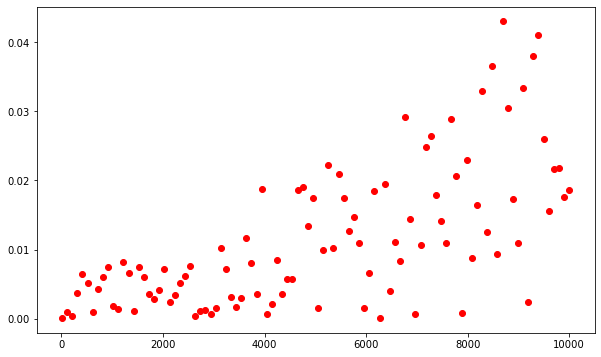

In [83]:
# runtimes when searching for a present element in a randomly shuffled list

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');

Worst Case Scenario is that the element is not present. 

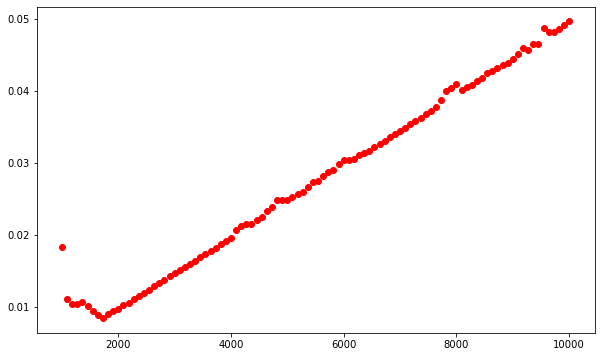

In [84]:
# runtimes when searching for an element that is not present

ns = np.linspace(1_000, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, -1)', 
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]

plt.plot(ns, ts, 'or');


* Takes longer if index in farther back in the list
    * timing depends on the number of iterations of the loop
    * because we stop earlier when we find the element
* longest possible timing is if element is not in list
* results in linear runtime growth: O(n)

### Binary search
Task: to locate an element with a given value in a list (array) whose contents are sorted in ascending order.

Breaks down a larger problem into a smaller problem
* Starts with middle index
    * if number is higher, excludes lower half
    * if number is lower, excludes lower half
* Continues this pattern continually breaking down non-excluded portion into smaller chunks

Has a runtime of: T(n) = log(n)
* Scales really well for larger inputs
* Very efficient

In [1]:
def contains(lst, x):
    # assume that lst is sorted!!!
    lo = 0
    hi = len(lst) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        if lst[mid] == x:
            return True
        elif x < lst[mid]: # removes 2nd half
            hi = mid - 1
        else: # x > lst[mid] # removes 1st half
            lo = mid + 1
    return False

In [7]:
lst = list(range(1000))
contains(lst, 1001)

False

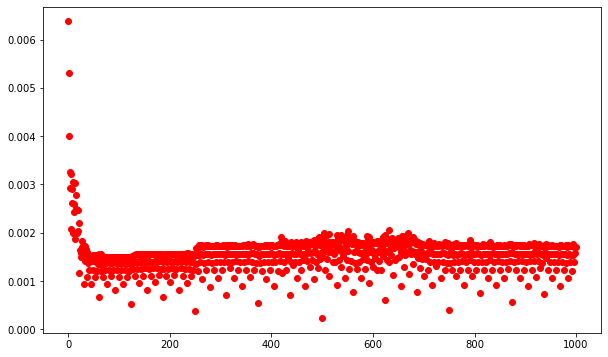

In [11]:
# runtimes when searching for different values in a fixed-size list

lst = list(range(1000))
ns = range(1000)
ts = [timeit.timeit('contains(lst, {})'.format(x), 
                    globals=globals(), 
                    number=1000)
      for x in range(1000)]

plt.plot(ns, ts, 'or');

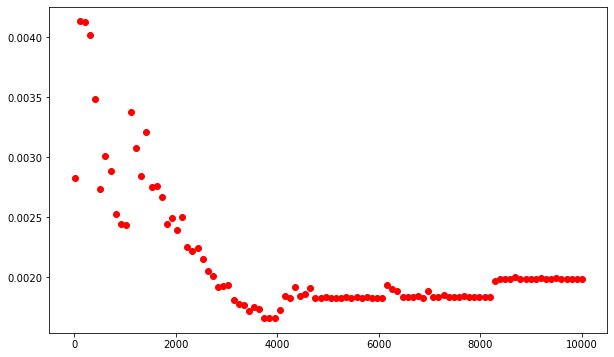

In [12]:
# runtimes when searching for an edge-value in lists of increasing size

ns = np.linspace(10, 10_000, 100, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup='lst=list(range({}))'.format(n),
                    globals=globals(),
                    number=1000)
      for n in ns]

plt.plot(ns, ts, 'or');

### Insertion sort



Task: to sort the values in a given list (array) in ascending order.



In [1]:
import random
  lst = list(range(1000))
  random.shuffle(lst)

In [1]:
plt.plot(lst, 'ro')
  plt.show()

In [1]:
def insertion_sort(lst):
      pass

In [1]:
insertion_sort(lst)

In [1]:
plt.plot(lst, 'ro')
  plt.show()

In [1]:
import timeit
  import random
  times = [timeit.timeit(stmt='insertion_sort(lst)',
                         setup='lst=list(range({})); random.shuffle(lst)'.format(size),
                         globals=globals(),
                         number=1)
           for size in range(100, 5000, 250)]

In [1]:
plt.plot(times, 'ro')
  plt.show()